# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

The dataset is in the `data` folder.<br>
First, import the basic libraries and the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('../data/housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here
df = df.drop(["Id"], axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of what your output  should look like is ![here](../images/missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [4]:
# your code here
# first check out the data
empty_perc = df.isna().sum() / len(df) * 100
empty_perc.sort_values(ascending=False).head(25)

nan_df = empty_perc.to_frame().reset_index()
nan_df.columns = ["variable", "perc_missing"]
nan_df.sort_values(by ="perc_missing", ascending=False)

,variable,perc_missing
71,PoolQC,99.520548
73,MiscFeature,96.301370
5,Alley,93.767123
72,Fence,80.753425
56,FireplaceQu,47.260274
...,...,...
38,Heating,0.000000
39,HeatingQC,0.000000
1,MSZoning,0.000000
42,1stFlrSF,0.000000


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [5]:
# your code here
nan_df = nan_df.drop(nan_df[nan_df["perc_missing"] >20].index, axis=0)

#check if there are none >20% missing values left
nan_df.sort_values("perc_missing", ascending = False)

,variable,perc_missing
2,LotFrontage,17.739726
57,GarageType,5.547945
58,GarageYrBlt,5.547945
59,GarageFinish,5.547945
62,GarageQual,5.547945
...,...,...
36,BsmtUnfSF,0.000000
37,TotalBsmtSF,0.000000
1,MSZoning,0.000000
39,HeatingQC,0.000000


Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

<AxesSubplot:ylabel='Frequency'>

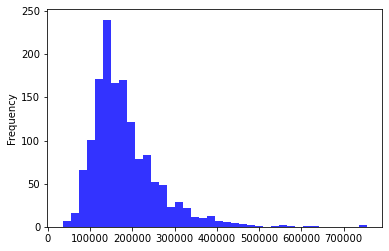

In [6]:
# your code here

bin_nr = int(np.sqrt(len(df["SalePrice"])))


df["SalePrice"].plot(kind = 'hist', color = 'b', alpha = 0.8, bins=bin_nr)

In [100]:
# your comment here
# I think the curve is skewed to the left, caused by very expensive houses.

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

In [101]:
# your code here


## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [7]:
# your code here
# add cells as needed
df.head()

df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

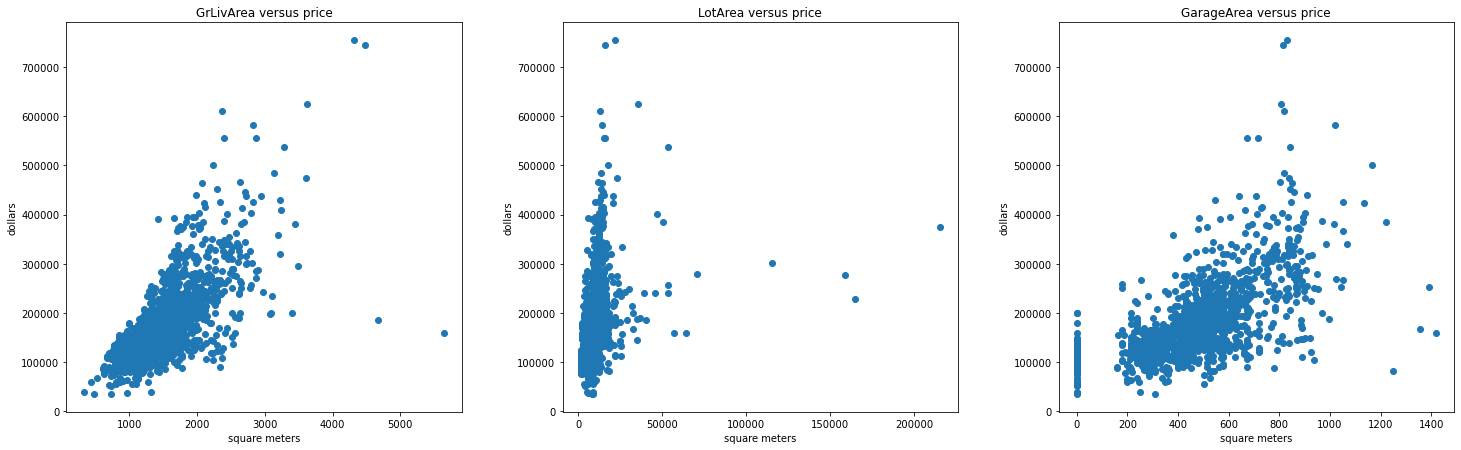

In [43]:
#make 3 plot-areas
fig, ax = plt.subplots(1, 3, figsize = (20,6))
fig.tight_layout(w_pad=7)

#list to pick column-name from
topic = ["GrLivArea","LotArea", "GarageArea"]

#fill the plot-areas
for i in range (3):
    ax[i].scatter(x = df[topic[i]], y=df["SalePrice"])
    ax[i].set_title(f'{topic[i]} versus price')
    ax[i].set_xlabel("square meters")
    ax[i].set_ylabel("dollars")

In [54]:
#BedroomAbvGr, KitchenAbvGr, FullBath, HalfBath, BsmtFullBath, BsmtHalfBath
#calculate number of bathrooms, and add column to dataframe
df["bathrooms"]=df["FullBath"] + (df["HalfBath"]/2) + df["BsmtFullBath"] + (df["BsmtHalfBath"])/2

#calculate time since built/ remodeling
df["house_age"] = 2021 - df["YearBuilt"]
df["house_remodeled"] = 2021 - df["YearRemodAdd"]

df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,bathrooms,house_age,house_remodeled
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2008,WD,Normal,208500,3.5,18,18
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,0,5,2007,WD,Normal,181500,2.5,45,45
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,0,9,2008,WD,Normal,223500,3.5,20,19
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,2,2006,WD,Abnorml,140000,2.0,106,51
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,0,12,2008,WD,Normal,250000,3.5,21,21


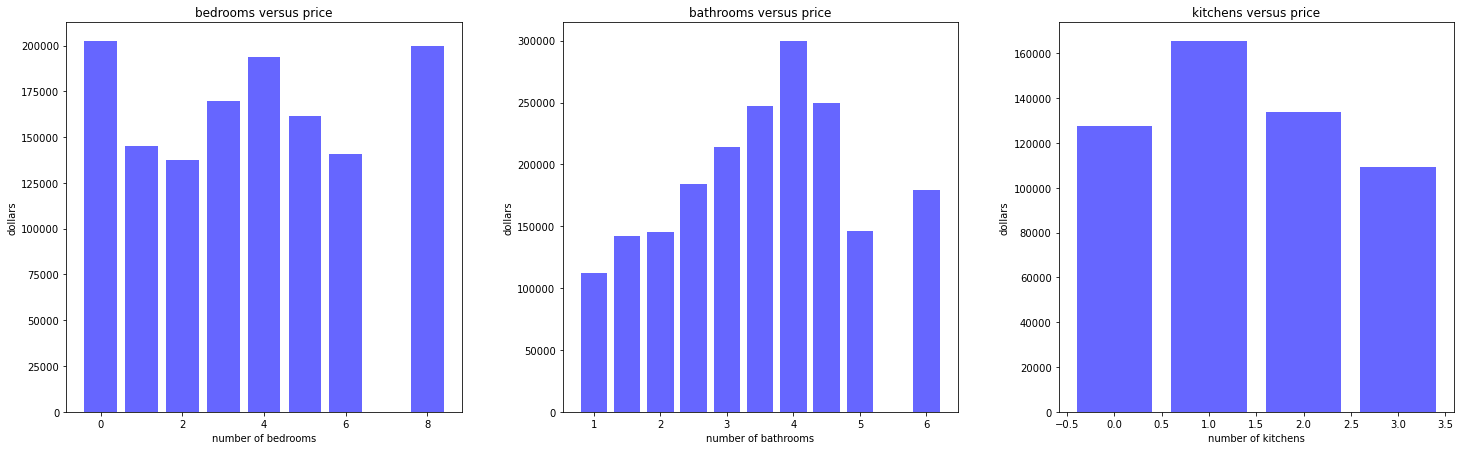

In [208]:
#calculate median saleprice for nr bathrooms, bedrooms and kitchens
df_bed = df_areas.groupby("BedroomAbvGr").median("SalePrice").reset_index()
df_bath = df_areas.groupby("bathrooms").median("SalePrice").reset_index()
df_kitchen = df_areas.groupby("KitchenAbvGr").median("SalePrice").reset_index()

lst = ["bed", "bath", "kitchen"]
col_names = ["BedroomAbvGr", "bathrooms", "KitchenAbvGr"]

# make plot-areas
fig2, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(20,6))
fig2.tight_layout(w_pad=7)


ax1.bar(x=df_bed["BedroomAbvGr"], height=df_bed["SalePrice"], data="df_bed", color='b', alpha=0.6, width=0.8)
ax1.set_title("bedrooms versus price")
ax1.set_ylabel('dollars')
ax1.set_xlabel('number of bedrooms')

ax2.bar(x=df_bath["bathrooms"], height=df_bath["SalePrice"], data=df_bath, color='b', alpha=0.6, width=0.4)
ax2.set_title("bathrooms versus price")
ax2.set_ylabel('dollars')
ax2.set_xlabel('number of bathrooms')

ax3.bar(x=df_kitchen["KitchenAbvGr"], height = df_kitchen["SalePrice"], data = df_kitchen, color='b', alpha=0.6, width=0.8)
ax3.set_title("kitchens versus price")
ax3.set_ylabel('dollars')
ax3.set_xlabel('number of kitchens')

plt.show();

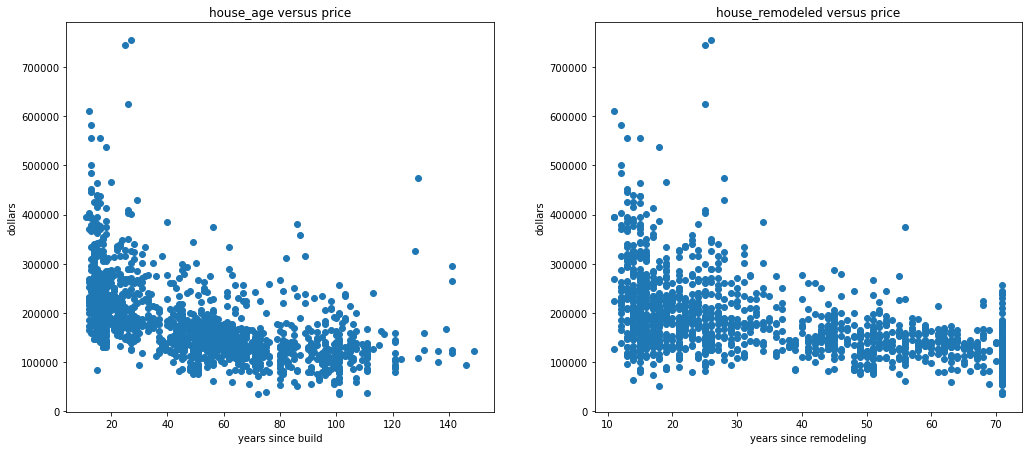

In [74]:
topic3 = ["house_age", "house_remodeled"]
measure=["years since build", "years since remodeling"]

fig, ax = plt.subplots(1, 2, figsize=(14,6))
fig.tight_layout(w_pad=7)

for i in range (2):
    ax[i].scatter(x=df[topic3[i]], y = df["SalePrice"])
    ax[i].set_title(f'{topic3[i]} versus price')
    ax[i].set_xlabel(f'{measure[i]}')
    ax[i].set_ylabel("dollars")

In [89]:
#check out the neighborhoods
print(len(df.Neighborhood.unique()))
df.Neighborhood.unique()

25


array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

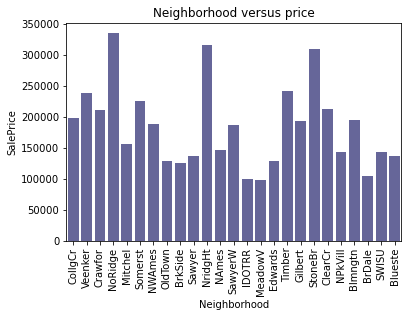

In [116]:
plot_neighb = df[["Neighborhood", "SalePrice"]].groupby(df["SalePrice"]).median()


sns.barplot(data=df, x=df["Neighborhood"], y=df["SalePrice"], color="blue", saturation=0.2, ci=False)
plt.xticks(rotation = 90)
plt.title("Neighborhood versus price")
plt.show();

# 

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like this ![example](../images/heatmap.png)

<AxesSubplot:>

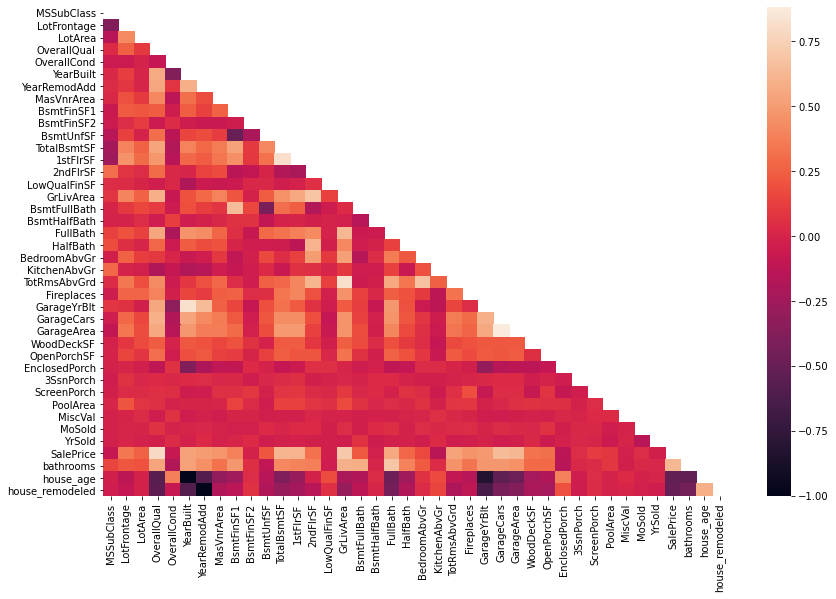

In [187]:
# your code here

df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))


f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(data = df_corr, mask=mask)



In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [202]:
# your comment here
# overall quality has a strong correlation with price (kinda nobrainer so not that interesting)
# kitchen, house age and house remodeled seem to be correlated too (though the plots show a lot of variation)

In [203]:
df_corr = df.corr()
df_corr['SalePrice'].sort_values()


"""
THESE VARS HAVE THE HIGHEST CORRELATION WITH PRICE. 

TotalBsmtSF        0.613581
GarageArea         0.623431 (probably corr with garage cars)
bathrooms          0.631731
GarageCars         0.640409 (probably corr with garagearea)
GrLivArea          0.708624
OverallQual        0.790982
"""

house_age         -0.522897
house_remodeled   -0.507101
KitchenAbvGr      -0.135907
EnclosedPorch     -0.128578
MSSubClass        -0.084284
OverallCond       -0.077856
YrSold            -0.028923
LowQualFinSF      -0.025606
MiscVal           -0.021190
BsmtHalfBath      -0.016844
BsmtFinSF2        -0.011378
3SsnPorch          0.044584
MoSold             0.046432
PoolArea           0.092404
ScreenPorch        0.111447
BedroomAbvGr       0.168213
BsmtUnfSF          0.214479
BsmtFullBath       0.227122
LotArea            0.263843
HalfBath           0.284108
OpenPorchSF        0.315856
2ndFlrSF           0.319334
WoodDeckSF         0.324413
LotFrontage        0.351799
BsmtFinSF1         0.386420
Fireplaces         0.466929
MasVnrArea         0.477493
GarageYrBlt        0.486362
YearRemodAdd       0.507101
YearBuilt          0.522897
TotRmsAbvGrd       0.533723
FullBath           0.560664
1stFlrSF           0.605852
TotalBsmtSF        0.613581
GarageArea         0.623431
bathrooms          0

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

In [ ]:
# your responses here
# add cells as needed

# 1). the nr of bathrooms shows a postive correlation with price (asymptotic, up to 4 bathrooms)
# 2). the square meters living area shows a positive correlation with price
# 3). the square meters garage area shows a positive correlation with price
# 4). neighborhood shows a correlation with price (might be caused by types of houses in the area)
# 5). years since remodeling shows a negative correlation with price
# 6). overall quality is such a no-brainer that I dont find it an interesting insight.


### Bathrooms: enough is enough
The number of bathrooms is correlated with house price, but only up to 4 bathrooms. After that the house prices seem to drop.

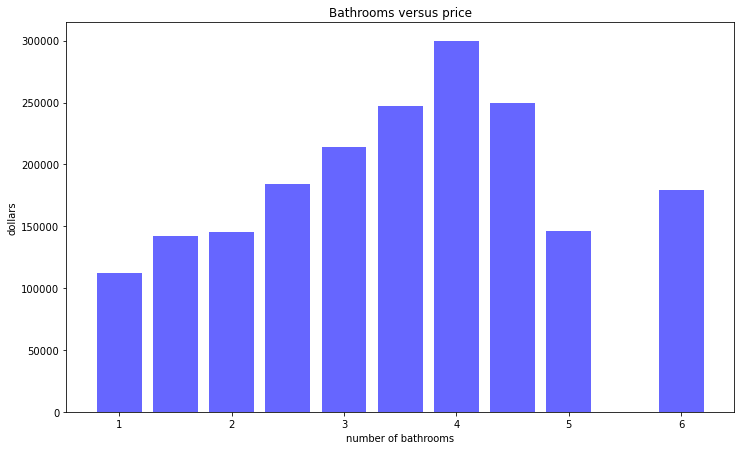

In [219]:
# make plot-areas
fig2, ax2 = plt.subplots(1,1, figsize=(10,6))
fig2.tight_layout(w_pad=7)


ax2.bar(x=df_bath["bathrooms"], height=df_bath["SalePrice"], data=df_bath, color='b', alpha=0.6, width=0.4)
ax2.set_title("Bathrooms versus price")
ax2.set_ylabel('dollars')
ax2.set_xlabel('number of bathrooms')


plt.show();

### Garage area
A bigger garage area is associated with higer house prices.

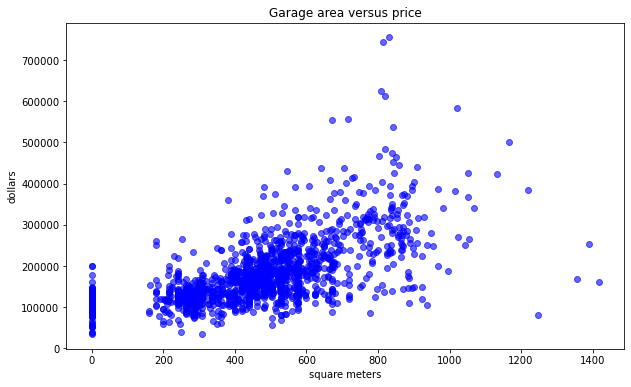

In [220]:
#make 3 plot-areas
fig, ax = plt.subplots(1, 1, figsize = (10,6))

ax.scatter(x = df["GarageArea"], y=df["SalePrice"], color='b', alpha=0.6)
ax.set_title("Garage area versus price")
ax.set_xlabel("square meters")
ax.set_ylabel("dollars")
plt.show();

### Neighborhood
The neighborhood is correlated with house prices. The houses in some neigborhoods tend to be more expensive than in others.


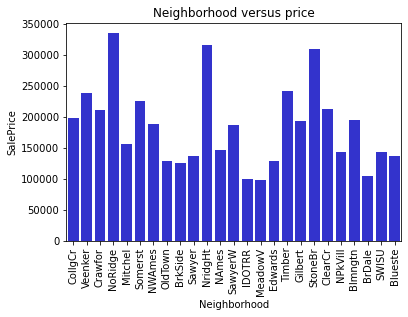

In [221]:
plot_neighb = df[["Neighborhood", "SalePrice"]].groupby(df["SalePrice"]).median()


sns.barplot(data=df, x=df["Neighborhood"], y=df["SalePrice"], color="blue", saturation=0.6, ci=False)
plt.xticks(rotation = 90)
plt.title("Neighborhood versus price")
plt.show();


### Living area
Spaciousness pays out: the bigger the area, the higher the price.

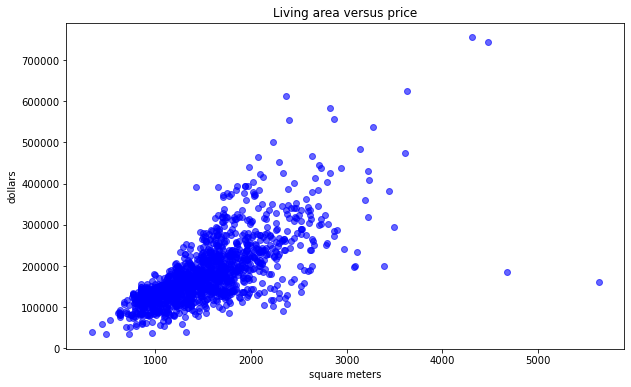

In [228]:
#make 3 plot-areas
fig, ax = plt.subplots(figsize = (10,6))


#fill the plot-areas
ax.scatter(x = df["GrLivArea"], y=df["SalePrice"], color='b', alpha=0.6)
ax.set_title("Living area versus price")
ax.set_xlabel("square meters")
ax.set_ylabel("dollars")

plt.show();

### Remodeling
Houses that are more recently remodeled, tend to get a higher price.

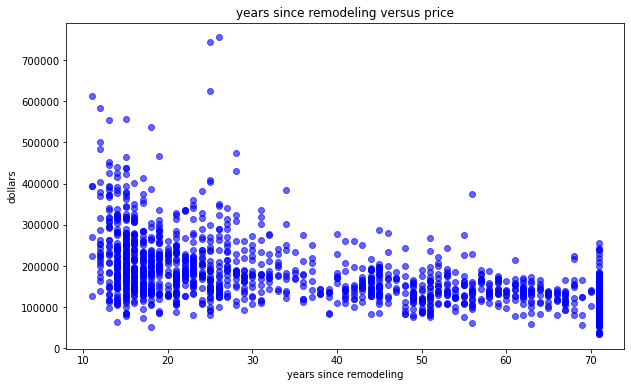

In [238]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x=df["house_remodeled"], y = df["SalePrice"], color='b', alpha=0.6)
ax.set_title("years since remodeling versus price")
ax.set_xlabel("years since remodeling")
ax.set_ylabel("dollars")

plt.show();